In [2]:
from google.colab import files
files.upload()  # Télécharger le fichier kaggle.json

Saving Salary_dataset.csv to Salary_dataset.csv


{'Salary_dataset.csv': b',YearsExperience,Salary\n0,1.2000000000000002,39344.0\n1,1.4000000000000001,46206.0\n2,1.6,37732.0\n3,2.1,43526.0\n4,2.3000000000000003,39892.0\n5,3.0,56643.0\n6,3.1,60151.0\n7,3.3000000000000003,54446.0\n8,3.3000000000000003,64446.0\n9,3.8000000000000003,57190.0\n10,4.0,63219.0\n11,4.1,55795.0\n12,4.1,56958.0\n13,4.199999999999999,57082.0\n14,4.6,61112.0\n15,5.0,67939.0\n16,5.199999999999999,66030.0\n17,5.3999999999999995,83089.0\n18,6.0,81364.0\n19,6.1,93941.0\n20,6.8999999999999995,91739.0\n21,7.199999999999999,98274.0\n22,8.0,101303.0\n23,8.299999999999999,113813.0\n24,8.799999999999999,109432.0\n25,9.1,105583.0\n26,9.6,116970.0\n27,9.7,112636.0\n28,10.4,122392.0\n29,10.6,121873.0\n'}

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


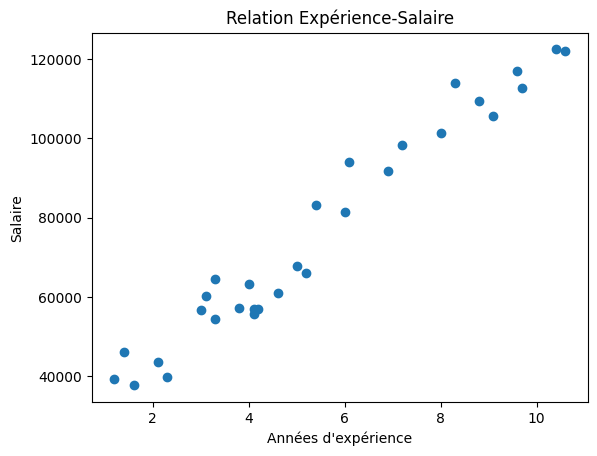

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

data = pd.read_csv('Salary_dataset.csv')
print(data.head())
print(data.describe())
print(data.isnull().sum())

# Visualisation
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Années d\'expérience')
plt.ylabel('Salaire')
plt.title('Relation Expérience-Salaire')
plt.show()

In [40]:
X = data[["YearsExperience"]].values
y = data["Salary"].values

In [41]:
# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y.reshape(-1, 1)  # Pour la compatibilité avec Keras

In [42]:
# Division des données
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [44]:
# Création du modèle
model = Sequential()
model.add(Dense(10, activation="relu", input_shape=(1,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation="linear"))  # Pas de fonction d'activation pour la régression

# Compilation
model.compile(optimizer=Adam(learning_rate=0.01), loss="mse")

# Entraînement
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=500,
    verbose=0
)

In [45]:
# Évaluation
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_loss:.2f}")

Test MSE: 6536976896.00


In [46]:
# Prédictions
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


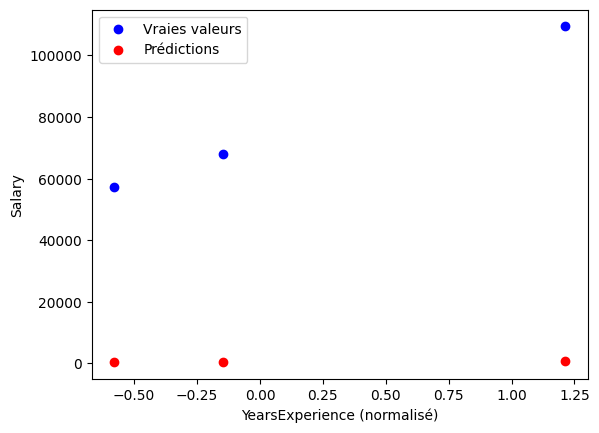

In [47]:

# Visualisation
plt.scatter(X_test, y_test, color="blue", label="Vraies valeurs")
plt.scatter(X_test, y_pred, color="red", label="Prédictions")
plt.xlabel("YearsExperience (normalisé)")
plt.ylabel("Salary")
plt.legend()
plt.show()